<a href="https://colab.research.google.com/github/PenLoo98/Python-Practice/blob/main/SVM_practice_2020_10_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target_name'] = iris['target_names'][iris['target'][:]]

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe94f8921d0>,
      dtype=object)

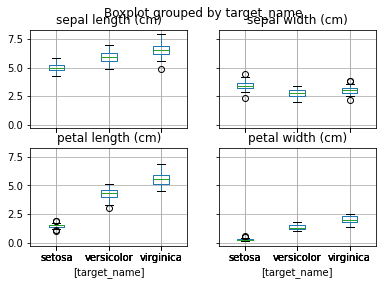

In [ ]:
df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], by=['target_name'])

In [ ]:
iris = df.rename(columns={ \
  'sepal length (cm)':'sl', \
  'sepal width (cm)':'sw', \
  'petal length (cm)':'pl', \
  'petal width (cm)':'pw', \
  'target_name':'class'})

iris

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


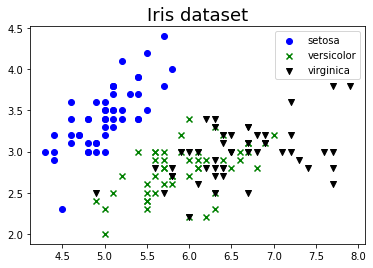

In [ ]:
setosa = iris[iris['class'] == 'setosa']
versicolor = iris[iris['class'] == 'versicolor']
virginica = iris[iris['class'] == 'virginica']
o = plt.scatter(setosa['sl'], setosa['sw'], marker='o', color='b')
x = plt.scatter(versicolor['sl'], versicolor['sw'], marker='x', color='g')
v = plt.scatter(virginica['sl'], virginica['sw'], marker='v', color='k')
plt.legend((o, x, v), ('setosa', 'versicolor', 'virginica'), loc='upper right')
plt.title("Iris dataset", fontsize=18)
plt.show()

In [ ]:
# 선형 SVM 분류

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris['target'] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline([
    ('scaller', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss="hinge"))
  ])
svm_clf.fit(X, y)

Pipeline(steps=[('scaller', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

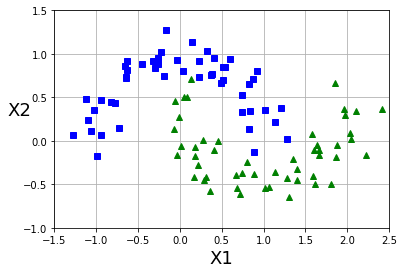

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
plt.axis([-1.5, 2.5, -1, 1.5])
plt.grid(True, which='both')
plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=18, rotation=0)
plt.show()

In [ ]:
# 빠르며ㅕ 성능 좋음
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([ \
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel="poly", degree=3, coef0=1, C=5))
  ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [ ]:
# 다항식 커널 svm import SVC
poly_kernel_svm_clf = Pipeline([ \
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel="poly", degree=3, coef0=1, C=5))
  ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [ ]:
# 가우시안 RBF

from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline([ \
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel="rbf", gamma=5, C=0.001))
  ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

[Text(0.4, 0.8333333333333334, 'pental length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'pental width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

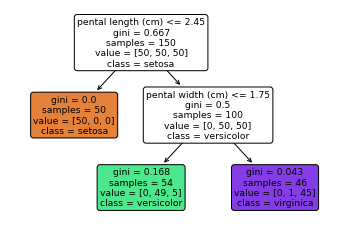

In [ ]:
# 결정 트리 학습과 시각화

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
plot_tree (tree_clf, feature_names=["pental length (cm)", "pental width (cm)"],
class_names=iris.target_names, rounded=True, filled=True)

In [ ]:
print( tree_clf.predict_proba( [[5, 1.5]]) )
print( tree_clf.predict( [[5, 1.5]]) )

[[0.         0.90740741 0.09259259]]
[1]


In [ ]:
# 회귀 - 7주차 p.42

import matplotlib.pyplot as plt
import numpy as np
# 2차식으로 만든 데이터셋 + 잡음 np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)